<a href="https://colab.research.google.com/github/Agnes-FD/Agnes-FD/blob/main/Model_CNN56.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/data'

/content/drive/MyDrive/data


In [3]:
ls

with_mask/  without_mask/


In [4]:
import os
path = '/content/drive/MyDrive/data'
# Membuat Label pada gambar berdasarkan klasifikasi
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(path):
  for name in files:
    full_path.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

In [5]:
# Membuat dataframe berdasarkan hasil klasifikasi data yang sudah diberi label
import pandas as pd

df = pd.DataFrame({"path":full_path, "file_name": file_name, "tag":tag})
df.groupby(['tag']).size()

tag
with_mask       3725
without_mask    3858
dtype: int64

In [6]:
# cek data yang sudah diberi label
df

,path,file_name,tag
0,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3409.jpg,with_mask
1,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3435.jpg,with_mask
2,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3402.jpg,with_mask
3,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3494.jpg,with_mask
4,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask_3499.jpg,with_mask
...,...,...,...
7578,/content/drive/MyDrive/data/without_mask/witho...,without_mask_2074.jpg,without_mask
7579,/content/drive/MyDrive/data/without_mask/witho...,without_mask_2419.jpg,without_mask
7580,/content/drive/MyDrive/data/without_mask/witho...,without_mask_127.jpg,without_mask
7581,/content/drive/MyDrive/data/without_mask/witho...,without_mask_1333 (1).jpg,without_mask


In [7]:
# Membagi dataset menjadi dua bagian (train dan test)
from sklearn.model_selection import train_test_split

x = df['path']
y = df['tag']

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size= 0.20, random_state=300)
x_test, x_val, y_test, y_val = train_test_split(
    x_test,y_test, test_size=0.5, random_state=100
)

In [8]:
# menyatukan kedalam masing-masing dataframe
df_test = pd.DataFrame({
    'path' : x_test,
    'tag' : y_test,
    'set' : 'test'
})

df_train = pd.DataFrame({
    'path' : x_train,
    'tag' : y_train,
    'set' : 'train'
})
df_val = pd.DataFrame({
    'path' : x_val,
    'tag' : y_val,
    'set' : 'validation'
})

In [9]:
print('train size', len(df_train))
print('test size', len(df_test))
print('validation size', len(df_val))

train size 6066
test size 758
validation size 759


In [10]:
# melihat masing-masing dataset apakah sudah sesuai atau belum
df_all = df_train.append([df_test, df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

df_all.sample(4)


set         tag         
test        with_mask        363
            without_mask     395
train       with_mask       3001
            without_mask    3065
validation  with_mask        361
            without_mask     398
dtype: int64 




,path,tag,set
4462,/content/drive/MyDrive/data/without_mask/witho...,without_mask,train
3682,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask,train
154,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask,train
5588,/content/drive/MyDrive/data/with_mask/with_mas...,with_mask,train


In [11]:
# Memindahkan dataset
import shutil
from tqdm.notebook import tqdm as tq
datasource_path = '/content/drive/MyDrive/data'
dataset_path = '/content/drive/MyDrive/dataset'

In [12]:
for index, row in tq(df_all.iterrows()):
  file_path = row['path']

  if os.path.exists(file_path) == False:
    file_path = os.path.join(datasource_path, row['tag'], row['image'].split('.')[0])

  if os.path.exists(os.path.join(dataset_path, row['set'], row['tag'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['tag']))
  
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(dataset_path, row['set'], row['tag'], destination_file_name)

  if os.path.exists(file_dest) == False:
    shutil.copy2(file_path, file_dest)

In [13]:
# Define Directory
base_dir = '/content/drive/MyDrive/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'validation')

In [14]:
#train test split
from sklearn.model_selection import train_test_split
train_without_mask_dir = os.path.join(train_dir, 'without_mask')
train_with_mask_dir = os.path.join(train_dir, 'with_mask')
test_without_mask_dir = os.path.join(test_dir, 'without_mask')
test_with_mask_dir = os.path.join(test_dir, 'with_mask')
val_without_mask_dir = os.path.join(val_dir, 'without_mask')
val_with_mask_dir = os.path.join(val_dir, 'with_mask')

In [15]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.4.1


In [16]:
#Image Augmentation
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'binary'
)
val_generator = datagen.flow_from_directory(
    test_dir,
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary'
)

Found 7256 images belonging to 2 classes.
Found 2107 images belonging to 2 classes.
Found 2107 images belonging to 2 classes.


In [37]:
# Membuat Model CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential()
model_cnn.add(Conv2D(32,(3,3), activation= 'relu', padding= 'same', name='conv_1', input_shape=(256,256,3)))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_1'))
model_cnn.add(Conv2D(64,(3,3),activation='relu', padding='same', name='conv_2'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_2'))
model_cnn.add(Conv2D(128,(3,3),activation='relu',padding='same', name='conv_3'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_3'))
model_cnn.add(Conv2D(256,(3,3),activation='relu',padding='same' ,name='conv_4'))
model_cnn.add(MaxPooling2D((2,2), name='maxpool_4'))

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(16, activation='relu', name= 'dense_1'))
model_cnn.add(Dense(1, activation='sigmoid', name= 'output'))
model_cnn.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 128, 128, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 128, 128, 64)      18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 64, 64, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 64, 64, 128)       73856     
_________________________________________________________________
maxpool_3 (MaxPooling2D)     (None, 32, 32, 128)       0         
_________________________________________________________________
conv_4 (Conv2D)              (None, 32, 32, 256)     

In [38]:
print('Compiling Model.......')
model_cnn.compile (optimizer='Adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

Compiling Model.......


In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print('Akurasi mencapai 97%, proses training dihentikan!')
      self.model.stop_training = True

callbacks = myCallback()

In [40]:
history_cnn = model_cnn.fit(
    train_generator,
    batch_size= 20,
    #steps_per_epoch = 20,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 10,
    callbacks = [callbacks]
)

Epoch 1/100
117/227 [==============>...............] - ETA: 23:57 - loss: 0.5252 - accuracy: 0.7348

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


227/227 [==============================] - 3228s 14s/step - loss: 0.4472 - accuracy: 0.7869 - val_loss: 0.2438 - val_accuracy: 0.8938
Epoch 2/100
227/227 [==============================] - 1309s 6s/step - loss: 0.2413 - accuracy: 0.9069 - val_loss: 0.2145 - val_accuracy: 0.9438
Epoch 3/100
227/227 [==============================] - 1283s 6s/step - loss: 0.2079 - accuracy: 0.9218 - val_loss: 0.1713 - val_accuracy: 0.9219
Epoch 4/100
227/227 [==============================] - 1257s 6s/step - loss: 0.1676 - accuracy: 0.9401 - val_loss: 0.2533 - val_accuracy: 0.9094
Epoch 5/100
227/227 [==============================] - 1249s 6s/step - loss: 0.1600 - accuracy: 0.9412 - val_loss: 0.1292 - val_accuracy: 0.9563
Epoch 6/100
227/227 [==============================] - 1237s 5s/step - loss: 0.1318 - accuracy: 0.9530 - val_loss: 0.1330 - val_accuracy: 0.9500
Epoch 7/100
227/227 [==============================] - 1233s 5s/step - loss: 0.1483 - accuracy: 0.9474 - val_loss: 0.0726 - val_accuracy: 0.9

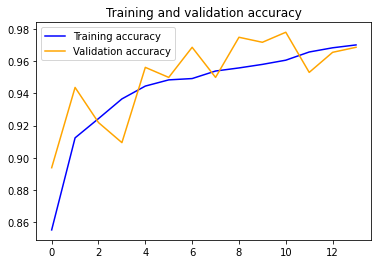

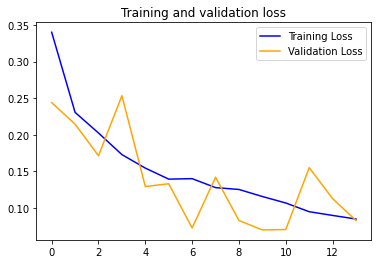

In [41]:
import matplotlib.pyplot as plt

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [42]:
cd'/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [43]:
#save model
import os

In [44]:
MODEL_BASE_PATH = "Model"
PROJECT_NAME ="CNN"
SAVE_MODEL_NAME = "Model_CNN56.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model_cnn.save(save_model_path,include_optimizer=False)

Saving Model At Model/CNN/Model_CNN56.h5...
